<a href="https://colab.research.google.com/github/anapmdm/Intro-ao-Pandas/blob/main/Analisando_os_Dados_do_Airbnb_%5BLondres%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Londres*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [19]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv('/content/londres.csv')

## Análise dos Dados


**Dicionário de algumas variáveis**
* **id** (do usuário)
* **name** (nome do local)
* **calculated_host_listings_count** (quantidade de imoveis do mesmo host)
* **availability_365**	(numeros de dias disponiveis em um ano)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [21]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [92]:
# o volume de dados do DataFrame
print("O volume de dados deste DataFrame é: \n{}".format(df.shape))
# tipos de variáveis do dataset
print("\nAqui os tipos de variáveis para este DF:\n{}:".
      format(df.dtypes))

O volume de dados deste DataFrame é: 
(69351, 18)

Aqui os tipos de variáveis para este DF:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object:


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [93]:
# ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.241958
last_review                       0.241958
name                              0.000303
host_name                         0.000072
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

*Podemos observar que a variável **License** está com **100%** dos valores nulos, seguida pela variável **neighbourhood_group**.*

*As variáveis **reviews_per_month** e **last_review** apresentam mais de 20% dos seus valores nulos.*

In [86]:
#criando um novo df limpo 
df_clean=df.copy()
df_clean.drop('neighbourhood_group', axis=1, inplace=True) #eliminando as colunas contendo dados nulos
df_clean.drop('license', axis=1, inplace=True)
df_clean.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,"Lovely large room, Bethnal Green",264345,Susie,Tower Hamlets,51.52874,-0.05396,Private room,55,3,65,2016-06-10,0.47,1,74,0
1,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56861,-0.11270,Private room,50,1,30,2022-07-15,0.20,2,343,9
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90,5,42,2022-01-04,0.34,1,222,1
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,Islington,51.52478,-0.10484,Private room,180,4,493,2022-09-02,3.59,5,236,20
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297,14,6,2022-07-04,0.05,1,180,2


### **Q3. Qual o tipo de distribuição das variáveis?** 

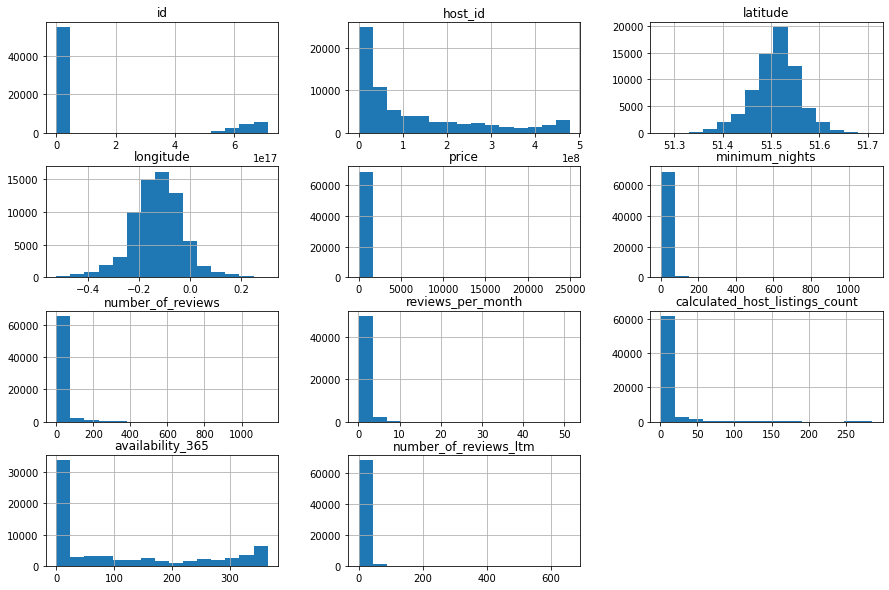

In [94]:
#histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

*Ao plotar os graficos das variaveis é possivel observar a presença de outliers.*

### **Q4. Qual a média dos preços de aluguel?**

In [29]:
# verificando a média da coluna `price``
df_clean.price.mean()

177.20882179060143

### **Q4. Qual a correlação existente entre as variáveis**

In [47]:
# matriz de correlação
df_corr = df_clean.corr()

# mostrar a matriz de correlação
df_corr.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.394795,-0.005484,-0.022523,0.068821,-0.022010,-0.183322,0.404081,0.076359,0.329078,-0.065535
host_id,0.394795,1.000000,-0.007001,-0.015827,0.047994,-0.001701,-0.127723,0.255745,0.020839,0.272046,0.048701
latitude,-0.005484,-0.007001,1.000000,0.104005,-0.002646,0.013378,-0.009611,-0.007595,0.020422,-0.005311,-0.006939
longitude,-0.022523,-0.015827,0.104005,1.000000,-0.053463,0.006682,-0.036711,-0.030541,-0.066605,-0.029521,-0.028974
price,0.068821,0.047994,-0.002646,-0.053463,1.000000,0.031468,-0.050701,-0.006831,0.311791,0.103498,-0.025045


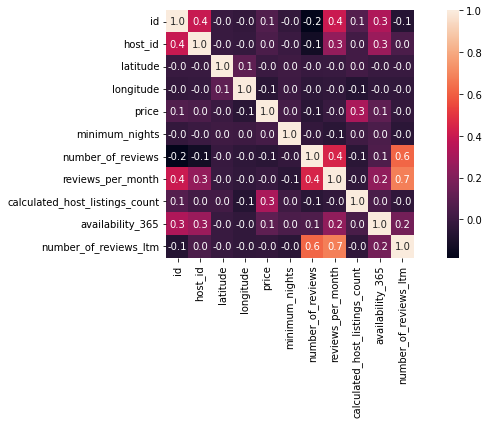

In [62]:
from numpy.ma.core import true_divide
# heatmap a partir das correlações
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df_corr, fmt='.1f', square=True, linecolor='white', annot=True);
plt.tight_layout()

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [32]:
# quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    41224
Private room       27479
Shared room          404
Hotel room           244
Name: room_type, dtype: int64

In [33]:
# porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]*100

Entire home/apt    59.442546
Private room       39.623077
Shared room         0.582544
Hotel room          0.351833
Name: room_type, dtype: float64

***Os clientes possuim por preferencia 59% em locar imoveis do tipo apartamento ou casa inteira, seguido de 39% de quartos privativos.***

### **Q6. Qual a localidade mais cara do dataset?**



In [89]:
# preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]


neighbourhood
Kensington and Chelsea    302.882047
Westminster               296.950148
City of London            269.063679
Hammersmith and Fulham    211.041389
Brent                     206.438104
Name: price, dtype: float64

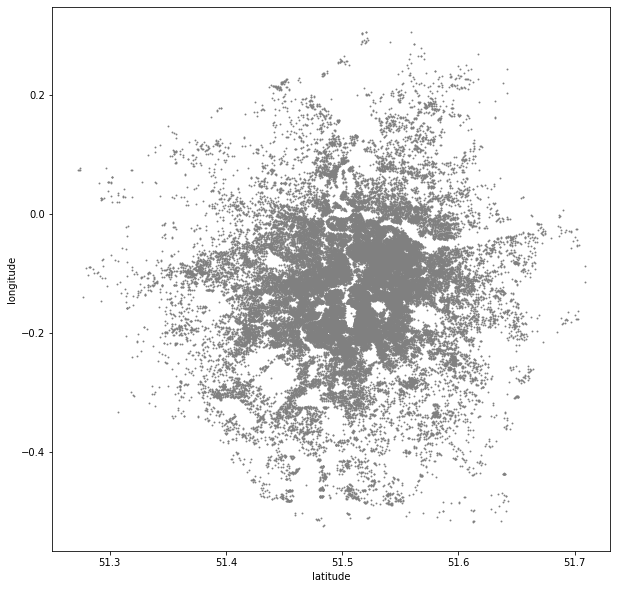

In [90]:
# imóveis pela latitude-longitude
fig, ax= plt.subplots()
df.plot.scatter(x='latitude', y='longitude',ax=ax, s=.8, color='gray',figsize=(10,10))
plt.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [91]:
# média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

5.997505443324537

## Conclusões


Foram analisados alguns dados básicos deste DF. Foi possivel verificar a presença de outliers em algumas variáveis, as quais posteriormente serão tratadas.

Através do scatter plot se observa que as localidades dos espaços disponiveis estão bem proximas. 
O df também nos mostra que a maioria dos clientes possui preferencia por locar espaços inteiros do tipo casa/apto e em segundo lugar quartos privativos.
